<a href="https://colab.research.google.com/github/KaidNassima/Challange-Kaggle/blob/main/Copie_de_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download and decompress The Dataset:

We retreive the link of the data file from the html source code of the page and load it into the colab environment using an unix command since the colab environment is container running on a linux kernel, anything that comes after the '!' is executed t by the system command-line.

In [ ]:
!wget 'https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/Archive/fishRecognition_GT.tar'

--2021-09-03 05:05:24--  https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/Archive/fishRecognition_GT.tar
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510912000 (487M) [application/x-tar]
Saving to: ‘fishRecognition_GT.tar’

fishRecognition_GT. 100%[===================>] 487.24M  4.92MB/s    in 1m 48s  

2021-09-03 05:07:13 (4.51 MB/s) - ‘fishRecognition_GT.tar’ saved [510912000/510912000]



Decompress and decode that tar file in order to retreive the data

In [ ]:
!tar -xvf fishRecognition_GT.tar

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
mask_image/mask_04/mask_004604697458_25086.png
mask_image/mask_04/mask_004604757458_08968.png
mask_image/mask_04/mask_004604757458_08970.png
mask_image/mask_04/mask_004604757458_09078.png
mask_image/mask_04/mask_004604757458_10222.png
mask_image/mask_04/mask_004604757458_11090.png
mask_image/mask_04/mask_004604757458_15432.png
mask_image/mask_04/mask_004604837458_09077.png
mask_image/mask_04/mask_004604857458_17760.png
mask_image/mask_04/mask_004604887458_11726.png
mask_image/mask_04/mask_004604887458_17623.png
mask_image/mask_04/mask_004604887458_21280.png
mask_image/mask_04/mask_004604897458_23260.png
mask_image/mask_04/mask_004604957458_13532.png
mask_image/mask_04/mask_004604957458_15905.png
mask_image/mask_04/mask_004604977458_08967.png
mask_image/mask_04/mask_004604977458_09619.png
mask_image/mask_04/mask_004604977458_13357.png
mask_image/mask_04/mask_004604977458_16125.png
mask_image/mask_04/mask_00460

In [ ]:
!ls

fish_image  fishRecognition_GT.tar  gdrive  mask_image	sample_data


In [ ]:
!ls fish_image/

fish_01  fish_04  fish_07  fish_10  fish_13  fish_16  fish_19  fish_22
fish_02  fish_05  fish_08  fish_11  fish_14  fish_17  fish_20  fish_23
fish_03  fish_06  fish_09  fish_12  fish_15  fish_18  fish_21


#Data Cleaning:

In [ ]:
import os

We look for different species of fish sharing the same trajectory and check if they truly represent different species 

In [ ]:
for i in range(1,10):
  for filename in os.listdir('fish_image/fish_0'+str(i)+'/'):
   for j in range(1,10):
      if(i==j):
        continue
      t=filename.split('_')[1]
      n=!ls fish_image/fish_0$j/fish_$t*  | wc -l 
      n=int(n[-1])
      if n!=0:
        print('fish_0'+str(i)+'/'+filename)
   for j in range(10,24):
      if(i==j):
        continue
      t=filename.split('_')[1]
      n=!ls fish_image/fish_$j/fish_$t*  | wc -l 
      n=int(n[-1])
      if n!=0:
        print('fish_0'+str(i)+'/'+filename)

for i in range(10,24):
  for filename in os.listdir('fish_image/fish_'+str(i)+'/'):
   for j in range(1,10):
      if(i==j):
        continue
      t=filename.split('_')[1]
      n=!ls fish_image/fish_0$j/fish_$t*  | wc -l 
      n=int(n[-1])
      if n!=0:
        print('fish_0'+str(i)+'/'+filename)
   for j in range(10,24):
      if(i==j):
        continue
      t=filename.split('_')[1]
      n=!ls fish_image/fish_$j/fish_$t*  | wc -l 
      n=int(n[-1])
      if n!=0:
        print('fish_'+str(i)+'/'+filename)


ls: cannot access 'fish_image/fish_16/fish_004360977106*': No such file or directory
0
^C


ValueError: ignored

#Data visualisation

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataAmount=[]
for i in range(1,24):
  if i<10:
    n=!ls fish_image/fish_0$i/ | wc -l 
    n=int(n[0])
  else:
    n=!ls fish_image/fish_$i/ | wc -l
    n=int(n[0])
  dataAmount.append(n)

<BarContainer object of 23 artists>

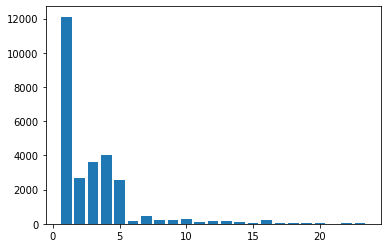

In [ ]:
plt.bar(range(1,24),dataAmount)

Judging from the data distribution, classes above 5 contain clearly too less  data than the other classes

In [ ]:
from tensorflow.keras.preprocessing import image
import random

(80, 87, 3)


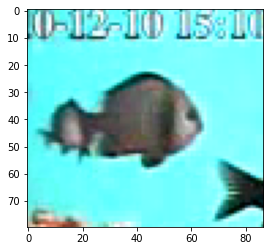

(63, 68, 3)


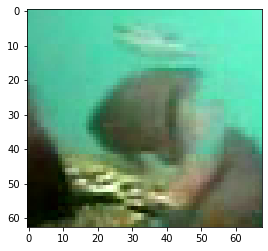

(108, 123, 3)


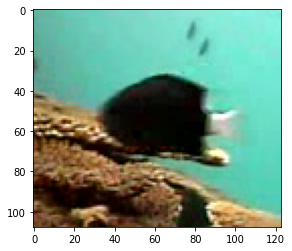

(99, 93, 3)


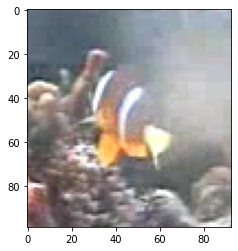

(92, 88, 3)


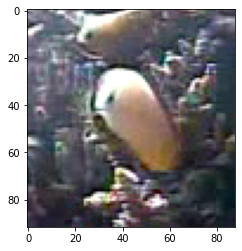

(78, 87, 3)


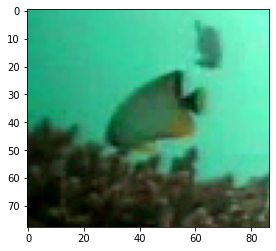

(67, 87, 3)


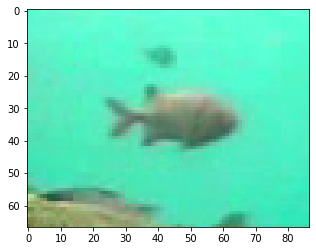

(88, 112, 3)


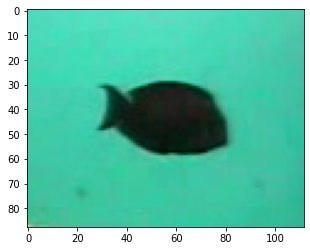

(115, 131, 3)


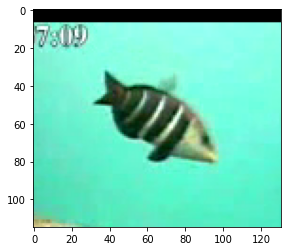

(85, 104, 3)


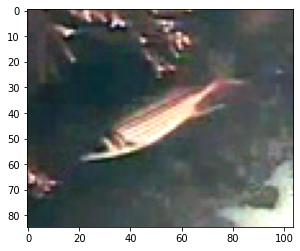

(240, 194, 3)


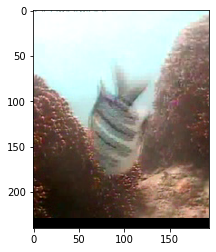

(124, 135, 3)


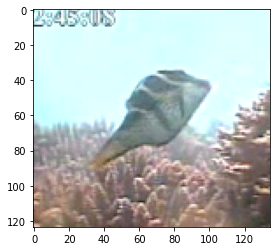

(192, 215, 3)


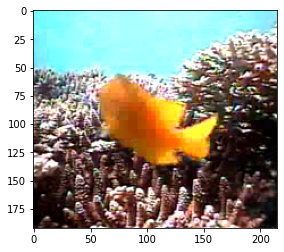

(112, 107, 3)


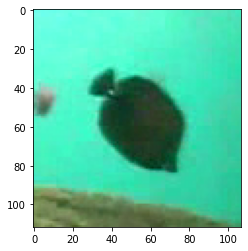

(90, 108, 3)


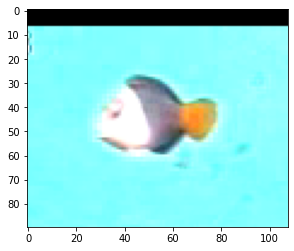

(214, 219, 3)


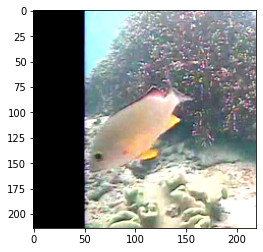

(83, 75, 3)


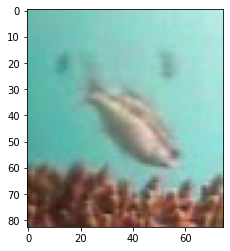

(76, 100, 3)


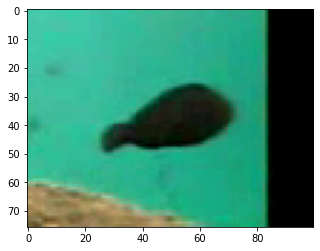

(136, 167, 3)


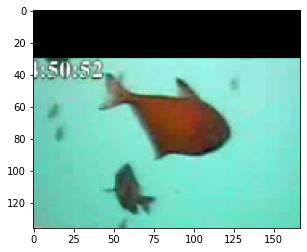

(308, 217, 3)


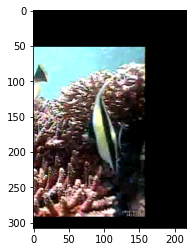

(78, 80, 3)


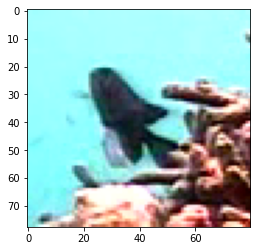

(135, 171, 3)


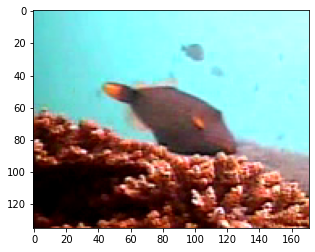

(92, 135, 3)


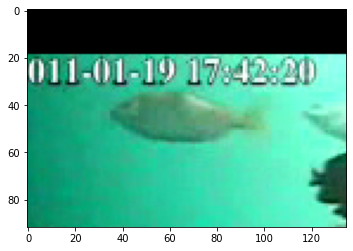

In [ ]:
for i in range(1,24):
  if i<10:
    n=!ls fish_image/fish_0$i/ | wc -l 
    n=int(n[0])
    a='fish_image/fish_0'+str(i)
    a=!ls $a
    rand = random.randint(0,int(n/2))
    im=a[rand]
    im=((im.split('.png'))[0])+'.png'
    im=image.load_img('fish_image/fish_0'+str(i)+'/'+im)
    im = image.img_to_array(im)
    plt.figure()
    plt.imshow(im/255)
    print(im.shape)
    
  else:
    n=!ls fish_image/fish_$i/ | wc -l
    n=int(n[0])
    rand = random.randint(0,int(n/2))
    a='fish_image/fish_'+str(i)
    a=!ls $a
    im=a[rand]
    im=((im.split('.png'))[0])+'.png'
    im=image.load_img('fish_image/fish_'+str(i)+'/'+im)
    im = image.img_to_array(im)
    plt.figure()
    plt.imshow(im/255)
    print(im.shape)
  plt.show()

#Data cleaning and preparation:

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
train_val_ids=[]
test_ids=[]
 
for i in range(1,10):
  ids=[]
  for filename in os.listdir('fish_image/fish_0'+str(i)+'/'):
    ids.append('fish_image/fish_0'+str(i)+'/'+filename)
  x1,x2=  train_test_split(ids,train_size=0.9,shuffle=True,)
  train_val_ids=train_val_ids+x1
  test_ids=test_ids+x2
 
for i in range(10,24):
  ids=[]
  for filename in os.listdir('fish_image/fish_'+str(i)+'/'):
    ids.append('fish_image/fish_'+str(i)+'/'+filename)
  x1,x2=  train_test_split(ids,train_size=0.9,shuffle=True)
  train_val_ids=train_val_ids+x1
  test_ids=test_ids+x2

A common technique is to split the train set into training data and a validation data that will be used later in the decision of which hyperparametters to use

In [ ]:
val_ids=[]
train_ids=[]
train_ids,val_ids=  train_test_split(train_val_ids,train_size=0.9,shuffle=True,)

In [ ]:
from tensorflow import keras
from skimage.transform import resize
import scipy 
from tensorflow.keras.preprocessing import image


Since the amount of the data is too huge to fit the RAM memory, we use a data generator in order to gradually load the images of a single batch then replace them with images of the following batch;


We use geometric transformations as well as a gaussian noise as data augmentation techniques and only apply them on classes above 5

In [ ]:
class  DataGenerator(keras.utils.Sequence):
    def __init__(self,list_IDs,num_classes,batch_size=1, dim=(224,224), n_channels=3,n_output=1,
                  shuffle=True,base='vgg16',data_augmentation=False):
        'Initialization'
        self.num_classes=num_classes
        self.list_IDs=list_IDs
        self.base=base
        self.list_IDs_temp=[]
        self.dim = dim
        self.batch_size = batch_size
        self.n_channels = n_channels
        self.n_output = n_output
        self.shuffle = shuffle
        self.data_augmentation=data_augmentation
        self.on_epoch_end()

    
    
    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs)/ self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        self.list_IDs_temp = [self.list_IDs[k] for k in indexes]
        
        # Generate data
        X, y = self.__data_generation(self.list_IDs_temp)
        
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    def update_y(self,ID):
        return self.labels[ID]
    def update_x(self,x):
        return x 

    def __data_generation(self, list_IDs_temp):
      'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
            
      X = np.empty((self.batch_size,*self.dim, self.n_channels))
      y = np.empty((self.batch_size), dtype=np.float32)
        # Generate data
      for i, ID in enumerate(list_IDs_temp):
            img = image.load_img(ID)
            img = image.img_to_array(img)
           
            img2= resize(img,(*self.dim,3))            
            if self.base=='vgg16':
              img2 = keras.applications.vgg16.preprocess_input(img2)
            if self.base=='resnet':
              img2 = keras.applications.resnet50.preprocess_input(img2)
            X[i,:,:,:]=img2
            
            
            parts = tf.strings.split(ID, os.path.sep)
            label=parts[-2]
            label = tf.strings.split(label, '_')
            label=int(label[-1])
            y[i]=label-1
            if self.data_augmentation:     
              if label>5 :
                swap=np.empty((len(X)+7,*self.dim, self.n_channels))
                swap[0:len(X),:,:,:]=X[:]
              
                img2=scipy.ndimage.rotate(img,-5)
                img2= resize(img,(*self.dim,3))            
                swap[-1,:,:,:]=img2
              
                img2=scipy.ndimage.rotate(img,90)
                img2= resize(img,(*self.dim,3))
                swap[-2,:,:,:]=img2
              
                img2=scipy.ndimage.rotate(img,180)
                img2= resize(img,(*self.dim,3))
                swap[-3,:,:,:]=img2

                img2=img[:,::-1, :]
                img2= resize(img,(*self.dim,3))
                swap[-4,:,:,:]=img2
             
                img2=img[::-1, :, :]
                img2= resize(img,(*self.dim,3))
                swap[-5,:,:,:]=img2
             
                noise = np.random.normal(0, .1,X[i,:,:,:].shape)       
                swap[-6,:,:,:]=X[i,:,:,:]+noise
              
                noise = np.random.normal(0, .1,X[i,:,:,:].shape)
                swap[-7,:,:,:]=X[i,:,:,:]+noise
                X=swap
              
                for c in range(1,8):
                  if self.base=='vgg16':
                    X[-c,:,:,:] = keras.applications.vgg16.preprocess_input(X[-c,:,:,:])
                  if self.base=='resnet':
                    X[-c,:,:,:] = keras.applications.resnet50.preprocess_input(X[-c,:,:,:])

              
                swap=np.empty((len(y)+7), np.float32)
                swap[0:len(y)]=y
                swap[len(y):]=y[i]
                y=swap
      
      return X, keras.utils.to_categorical(y, num_classes=self.num_classes)


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import MaxPooling2D ,Dense ,Dropout ,Input,concatenate,Conv2D,Reshape,GlobalMaxPooling2D,Flatten,GlobalAveragePooling2D,AveragePooling2D,Lambda,MaxPooling2D


The use of a deep cnn is inevitable in computer vision tasks however deep neural networks are prone to overfitting for that purpose we use transfer learning and load an already trained CNN architecture on the imagenet dataset

In [ ]:
def Base_Model(base,weights='imagenet', include_top=False, input_shape=(224, 224, 3)):
    if(base=='resnet'):
        return ResNet50(weights=weights, include_top=include_top, input_shape=input_shape,)
    if(base=='vgg16'):
        return VGG16(weights=weights, include_top=include_top, input_shape=input_shape)

CNN architecture visualisation

In [ ]:
base='vgg16'

In [ ]:
model =  Base_Model(base,weights='imagenet', include_top=False, input_shape=(224, 224, 3))


We visualize a sampling of the filters used on the first layer of the vgg cnn that are applied on the three channels of the input image and some filters applied on the second layer of the cnn it is also to be noted that as the input data pass through the cnn layers the resulting depth increases



Filters:
Please select a number of filters to be printed: 
5
#### FIRST LAYER: ####


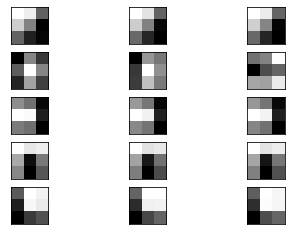

#### SECOND LAYER: ####


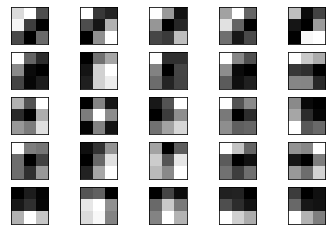

In [ ]:
print("\n\nFilters:")
print("Please select a number of filters to be printed: ")
n_filters=input()
n_filters=int(n_filters)
###############################################################################
filters, biases = model.layers[1].get_weights()
# normalization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first filters
ix =  1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
      ax = plt.subplot(n_filters, 3, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(f[:, :, j], cmap='gray')
      ix += 1  
print("#### FIRST LAYER: ####")
plt.show()

filters, biases = model.layers[2].get_weights()
# normalization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first filters
ix =  1
for i in range(n_filters):
    f = filters[:, :, :, i]
    #In reality these filters have a depth of 64 we'll only visualise the first 5 channels
    for j in range(5):
      ax = plt.subplot(n_filters,5, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(f[:, :, j], cmap='gray')
      ix += 1
print("#### SECOND LAYER: ####")
plt.show()


###############################################################################

As we visualise the filters we notice that the first layer filters are verry similar across the channels in the first layer which may refer to the fact that the data of the three channels is as relevant, however the filters start varrying from a channel to anether starting from the second layer

During our tests we found out that the feature extraction takes a longer time, we extract the features alone and use them as inputs the FC layers directly in order to speed up the training process, using this technique is equivalent to an end to end training using a frozen CNN 

Extraction of vgg 16 training features

In [ ]:
def Feature_Extraction(train_ids,val_ids,test_ids,base='vgg16'):
  base_model =  Base_Model(base,weights='imagenet', include_top=False, input_shape=(224, 224, 3))
  x=base_model.layers[-1].output
  x1=GlobalAveragePooling2D()(x)
  model=keras.Model(inputs=base_model.layers[0].output,outputs=x1)
  print("Model archtecture's details:")
  model.summary()
 
#Training features:
  generator=DataGenerator(train_ids,23,data_augmentation=True,shuffle=False,base=base)
  train_features = model.predict_generator(generator=generator)
  y=[]
  for i in train_ids:
    parts = tf.strings.split(i, os.path.sep)
    label=parts[-2]
    label = tf.strings.split(label, '_')
    label=int(label[-1])
    y.append(label-1)
    if (label)>5:
      for k in range(7):
        y.append(y[-1])
  y_train=np.array(y)
  print("Train features generated!")
#Validation features:
  generator=DataGenerator(val_ids,23,data_augmentation=False,shuffle=False,base=base)
  validation_features = model.predict_generator(generator=generator)
  y=[]
  for i in val_ids:
    parts = tf.strings.split(i, os.path.sep)
    label=parts[-2]
    label = tf.strings.split(label, '_')
    label=int(label[-1])
    y.append(label-1)
    
  y_val=np.array(y)
  print("Validation features generated!")
#Test features:
  generator=DataGenerator(test_ids,23,data_augmentation=False,shuffle=False,base=base)
  test_features = model.predict_generator(generator=generator)
  y=[]
  for i in test_ids:
    parts = tf.strings.split(i, os.path.sep)
    label=parts[-2]
    label = tf.strings.split(label, '_')
    label=int(label[-1])
    y.append(label-1)
   
  y_test=np.array(y)
  print("Test features generated!")
  return [train_features,y_train,validation_features,y_val,test_features,y_test]

In [ ]:
[X_train_vgg16,y_train_vgg16,X_val_vgg16,y_val_vgg16,X_test_vgg16,y_test_vgg16]=Feature_Extraction(train_ids,val_ids,test_ids,base='vgg16')

In [ ]:
[X_train_resnet,y_train_resnet,X_val_resnet,y_val_resnet,X_test_resnet,y_test_resnet]=Feature_Extraction(train_ids,val_ids,test_ids,base='resnet')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import h5py

This step is optional, we decide to save the feature since their extraction is time and ressource consuming, while the colab's graphical gpu can only be available within a limited period, by saving the features there's no need to extract them over and over each time we want to edit or test new functions in our project

#Save:

In [ ]:
try:
  h5f = h5py.File('/content/gdrive/My Drive/AICommonsChallenge/features_resnet.h5', 'w')
except:
  print("Please make sure to create the directory before saving these features")
  print("You can use the command '!/content/gdrive/My Drive/AICommonsChallenge/'")
  
h5f.create_dataset('X_train', data=X_train_resnet)
h5f.create_dataset('X_val', data=X_val_resnet)
h5f.create_dataset('X_test', data=X_test_resnet)
h5f.create_dataset('y_train', data=y_train_resnet)
h5f.create_dataset('y_val', data=y_val_resnet)
h5f.create_dataset('y_test', data=y_test_resnet)
h5f.close()


In [ ]:
try:
  h5f = h5py.File('/content/gdrive/My Drive/AICommonsChallenge/features_vgg16.h5', 'w')
except:
  print("Please make sure to create the directory before saving these features")
  print("You can use the command '!/content/gdrive/My Drive/AICommonsChallenge/'")

h5f.create_dataset('X_train', data=X_train_vgg16)
h5f.create_dataset('X_val', data=X_val_vgg16)
h5f.create_dataset('X_test', data=X_test_vgg16)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('y_val', data=y_val)
h5f.create_dataset('y_test', data=y_test)
h5f.close()


#Read:

In [ ]:
h5f = h5py.File('/content/gdrive/My Drive/AICommonsChallenge/features_vgg16.h5', 'r')
X_train_vgg16 = h5f['X_train'][:]
X_val_vgg16 = h5f['X_val'][:]
X_test_vgg16 = h5f['X_test'][:]
y_train_vgg16 = h5f['y_train'][:]
y_test_vgg16 = h5f['y_test'][:]
y_val_vgg16 = h5f['y_val'][:]
h5f.close()

In [ ]:
h5f = h5py.File('/content/gdrive/My Drive/AICommonsChallenge/features_resnet.h5', 'r')
X_train_resnet = h5f['X_train'][:]
X_val_resnet = h5f['X_val'][:]
X_test_resnet = h5f['X_test'][:]
y_train_resnet = h5f['y_train'][:]
y_test_resnet = h5f['y_test'][:]
y_val_resnet = h5f['y_val'][:]
h5f.close()

#Model:

In [ ]:
def pretrained_f(input=512,dropOutRate=0.25,hidden_units=512,num_layers=3):
    
   
    x2=Input(shape=input)
    x2_=Flatten()(x2)
    for i in range(num_layers):
        x2_=Dense(hidden_units,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.001))(x2_)
        x2_=Dropout(dropOutRate)(x2_)
    
    x3=Dense(23,activation="relu")(x2_)
    
    model=keras.Model(inputs=x2,outputs=x3)   

    return model

In [ ]:
import datetime
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau ,Callback,TensorBoard,TerminateOnNaN

#HyperParametter Tunning:

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb

import plotly.graph_objects as go
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler


In [ ]:
!pip install ax-platform

     |████████████████████████████████| 844 kB 4.2 MB/s 
     |████████████████████████████████| 475 kB 38.3 MB/s 
     |████████████████████████████████| 503 kB 42.9 MB/s 


In [ ]:
# Define the search space.
parameters=[
    {
        "name": "learning_rate",
        "type": "range",
        "bounds": [0.0001, 0.01],
        "log_scale": True,
    },
    

    {
        "name": "num_layer_p",
        "type": "range",
        "bounds": [1, 5],
        "value_type": "int"
    },
    {
        "name": "hidden_units_p",
        "type": "choice",
        "values": [256,512,1024],
        "value_type": "int"
    },
    {
        "name": "dropOutRate_p",
        "type": "choice",
        "values": [0,0.25,0.5],
        "value_type": "float"

    },
    
    {
        "name": "batch_size",
        "type": "choice",
        "values": [2, 4,16,32],
    },
    {
        "name": "optimizer",
        "type": "choice",
        "values": ['adam', 'rms'],
    },
]

In [ ]:
# This returns a multi-layer-perceptron model in Keras.
def get_keras_model(dropOutRate_p,hidden_units_p,num_layer_p):
    return pretrained_f(input_,dropOutRate=dropOutRate_p,
                        hidden_units=hidden_units_p,
                        num_layers=num_layer_p)
    

# This function takes in the hyperparameters and returns a score (Cross validation).
def keras_mlp_cv_score(parameterization, weight=None):
    
    model = get_keras_model(parameterization.get('dropOutRate_p'),
    parameterization.get('hidden_units_p'),
    parameterization.get('num_layer_p'))
    opt = parameterization.get('optimizer')
    opt = opt.lower()
    
    learning_rate = parameterization.get('learning_rate')
    
    if opt == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif opt == 'rms':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    NUM_EPOCHS = 30
    
    # Specify the training configuration.
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['mse','accuracy'])
    callbacks = [ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,verbose=1),
       EarlyStopping(monitor='val_loss', patience=10, verbose=1,restore_best_weights=True),
       tf.keras.callbacks.TerminateOnNaN()
    ]


    res = model.fit(x=X_train,y=y_train,batch_size=parameterization.get('batch_size'),
                                validation_data=(X_val,y_val), epochs=NUM_EPOCHS, callbacks=callbacks)
    
    # look at the last 10 epochs. Get the mean and standard deviation of the validation score.
    last10_scores = np.array(res.history['val_loss'][-10:])
    mean = last10_scores.mean()
    sem = last10_scores.std()
    
    # If the model didn't converge then set a high loss.
    if np.isnan(mean):
        return 9999.0, 0.0
    
    return mean, sem

In [ ]:
def objective(hyperparameters):
    """Returns validation score from hyperparameters"""
    
    model = Classifier(hyperparameters)
    validation_loss = cross_validation(model, validation_data)    
    return validation_loss


In [ ]:
#Comment the a line according to the model that is going to be tested 
base='resnet'
#base='vgg16'
if base=='vgg16':
  input_=512 
  X_train=X_train_vgg16
  X_val=X_val_vgg16
  X_test=X_test_vgg16
  y_train=y_train_vgg16
  y_val=y_val_vgg16
  y_test=y_test_vgg16
if base=='resnet':
  input_=2048 
  X_train=X_train_resnet
  X_val=X_val_resnet
  X_test=X_test_resnet
  y_train=y_train_resnet
  y_val=y_val_resnet
  y_test=y_test_resnet


In [ ]:
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting

init_notebook_plotting()

ax_client = AxClient()

# create the experiment.
ax_client.create_experiment(
    name="keras_experiment",
    parameters=parameters,
    objective_name='keras_cv',
    minimize=True)

def evaluate(parameters):
    return {"keras_cv": keras_mlp_cv_score(parameters)}


In [ ]:
for i in range(15):
    parameters, trial_index = ax_client.get_next_trial()
    ax_client.complete_trial(trial_index=trial_index, raw_data=evaluate(parameters))
    best_parameters, values = ax_client.get_best_parameters()
    for k in best_parameters.items():
        print(k)

    
# look at all the trials.
ax_client.get_trials_data_frame().sort_values('trial_index')

[INFO 09-03 09:52:31] ax.service.ax_client: Generated new trial 6 with parameters {'learning_rate': 0.0, 'num_layer_p': 4, 'hidden_units_p': 512, 'dropOutRate_p': 0.5, 'batch_size': 4, 'optimizer': 'rms'}.


Epoch 1/30
8949/8949 [==============================] - 52s 6ms/step - loss: 2.0358 - mse: 57.7666 - accuracy: 0.4236 - val_loss: 1.3869 - val_mse: 28.6009 - val_accuracy: 0.6050
Epoch 2/30
8949/8949 [==============================] - 53s 6ms/step - loss: 1.9301 - mse: 67.0779 - accuracy: 0.4369 - val_loss: 1.3827 - val_mse: 36.5968 - val_accuracy: 0.6062
Epoch 3/30
8949/8949 [==============================] - 51s 6ms/step - loss: 1.9403 - mse: 74.3995 - accuracy: 0.4339 - val_loss: 1.3733 - val_mse: 47.9943 - val_accuracy: 0.6033
Epoch 4/30
8949/8949 [==============================] - 51s 6ms/step - loss: 1.9364 - mse: 86.1078 - accuracy: 0.4351 - val_loss: 1.4068 - val_mse: 55.4880 - val_accuracy: 0.6041
Epoch 5/30
8949/8949 [==============================] - 52s 6ms/step - loss: 1.9539 - mse: 99.5098 - accuracy: 0.4333 - val_loss: 1.4445 - val_mse: 74.5371 - val_accuracy: 0.6050
Epoch 6/30
8949/8949 [==============================] - 51s 6ms/step - loss: 1.9672 - mse: 105.6452 - acc

[INFO 09-03 10:04:08] ax.service.ax_client: Completed trial 6 with data: {'keras_cv': (1.46, 0.05)}.
[INFO 09-03 10:04:08] ax.service.ax_client: Generated new trial 7 with parameters {'learning_rate': 0.0, 'num_layer_p': 2, 'hidden_units_p': 256, 'dropOutRate_p': 0.5, 'batch_size': 4, 'optimizer': 'rms'}.



Epoch 00013: ReduceLROnPlateau reducing learning rate to 2.4710659999982456e-06.
Restoring model weights from the end of the best epoch.
Epoch 00013: early stopping
('learning_rate', 0.004001939848177462)
('num_layer_p', 1)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 32)
('optimizer', 'adam')
Epoch 1/30
8949/8949 [==============================] - 33s 4ms/step - loss: 2.0799 - mse: 59.5714 - accuracy: 0.3985 - val_loss: 1.1309 - val_mse: 27.5245 - val_accuracy: 0.6784
Epoch 2/30
8949/8949 [==============================] - 32s 4ms/step - loss: 2.0185 - mse: 68.5494 - accuracy: 0.4036 - val_loss: 1.1319 - val_mse: 47.2393 - val_accuracy: 0.6841
Epoch 3/30
8949/8949 [==============================] - 32s 4ms/step - loss: 2.0163 - mse: 79.1408 - accuracy: 0.4029 - val_loss: 1.1750 - val_mse: 64.0686 - val_accuracy: 0.6829
Epoch 4/30
8949/8949 [==============================] - 32s 4ms/step - loss: 2.0145 - mse: 87.9224 - accuracy: 0.4047 - val_loss: 1.1340 - val_mse: 76

[INFO 09-03 10:10:16] ax.service.ax_client: Completed trial 7 with data: {'keras_cv': (1.16, 0.02)}.
[INFO 09-03 10:10:16] ax.service.ax_client: Generated new trial 8 with parameters {'learning_rate': 0.0, 'num_layer_p': 1, 'hidden_units_p': 256, 'dropOutRate_p': 0.25, 'batch_size': 32, 'optimizer': 'rms'}.



Epoch 00011: ReduceLROnPlateau reducing learning rate to 9.080296877073124e-06.
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
('learning_rate', 0.004001939848177462)
('num_layer_p', 1)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 32)
('optimizer', 'adam')
Epoch 1/30
1119/1119 [==============================] - 5s 4ms/step - loss: 2.9228 - mse: 53.4258 - accuracy: 0.3614 - val_loss: 2.6678 - val_mse: 20.9650 - val_accuracy: 0.5964
Epoch 2/30
1119/1119 [==============================] - 4s 4ms/step - loss: 2.5400 - mse: 57.5641 - accuracy: 0.4756 - val_loss: 2.3923 - val_mse: 24.3432 - val_accuracy: 0.7036
Epoch 3/30
1119/1119 [==============================] - 4s 4ms/step - loss: 2.1670 - mse: 59.2531 - accuracy: 0.5933 - val_loss: 2.2423 - val_mse: 27.0445 - val_accuracy: 0.7458
Epoch 4/30
1119/1119 [==============================] - 4s 4ms/step - loss: 2.1361 - mse: 63.6703 - accuracy: 0.6013 - val_loss: 2.1554 - val_mse: 29.6944

[INFO 09-03 10:12:04] ax.service.ax_client: Completed trial 8 with data: {'keras_cv': (2.14, 0.01)}.



Epoch 00019: ReduceLROnPlateau reducing learning rate to 3.2309480593539776e-05.
Restoring model weights from the end of the best epoch.
Epoch 00019: early stopping


[INFO 09-03 10:12:05] ax.service.ax_client: Generated new trial 9 with parameters {'learning_rate': 0.0, 'num_layer_p': 2, 'hidden_units_p': 256, 'dropOutRate_p': 0.5, 'batch_size': 16, 'optimizer': 'adam'}.


('learning_rate', 0.004001939848177462)
('num_layer_p', 1)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 32)
('optimizer', 'adam')
Epoch 1/30
2238/2238 [==============================] - 9s 4ms/step - loss: 0.9550 - mse: 50.4860 - accuracy: 0.7544 - val_loss: 0.1564 - val_mse: 17.0323 - val_accuracy: 0.9574
Epoch 2/30
2238/2238 [==============================] - 8s 4ms/step - loss: 0.4116 - mse: 52.9152 - accuracy: 0.8902 - val_loss: 0.1429 - val_mse: 19.9416 - val_accuracy: 0.9602
Epoch 3/30
2238/2238 [==============================] - 9s 4ms/step - loss: 0.3010 - mse: 55.6292 - accuracy: 0.9163 - val_loss: 0.1149 - val_mse: 24.4757 - val_accuracy: 0.9667
Epoch 4/30
2238/2238 [==============================] - 8s 4ms/step - loss: 0.2658 - mse: 58.7594 - accuracy: 0.9229 - val_loss: 0.1152 - val_mse: 27.6178 - val_accuracy: 0.9679
Epoch 5/30
2238/2238 [==============================] - 8s 4ms/step - loss: 0.2429 - mse: 61.2754 - accuracy: 0.9296 - val_loss: 0.1190 - val

[INFO 09-03 10:15:27] ax.service.ax_client: Completed trial 9 with data: {'keras_cv': (0.09, 0.0)}.
[INFO 09-03 10:15:27] ax.service.ax_client: Generated new trial 10 with parameters {'learning_rate': 0.0, 'num_layer_p': 3, 'hidden_units_p': 1024, 'dropOutRate_p': 0.25, 'batch_size': 16, 'optimizer': 'adam'}.


('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
2238/2238 [==============================] - 15s 7ms/step - loss: 2.6423 - mse: 57.5552 - accuracy: 0.4303 - val_loss: 2.3693 - val_mse: 25.6896 - val_accuracy: 0.6788
Epoch 2/30
2238/2238 [==============================] - 14s 6ms/step - loss: 2.6177 - mse: 70.7511 - accuracy: 0.4432 - val_loss: 2.3461 - val_mse: 33.2787 - val_accuracy: 0.6857
Epoch 3/30
2238/2238 [==============================] - 14s 6ms/step - loss: 2.6185 - mse: 76.6743 - accuracy: 0.4432 - val_loss: 2.3874 - val_mse: 51.9915 - val_accuracy: 0.6752
Epoch 4/30
2238/2238 [==============================] - 14s 6ms/step - loss: 2.6072 - mse: 82.4823 - accuracy: 0.4459 - val_loss: 2.3531 - val_mse: 55.9315 - val_accuracy: 0.6821
Epoch 5/30
2238/2238 [==============================] - 14s 6ms/step - loss: 2.6111 - mse: 95.1922 - accuracy: 0.4447 - val_loss: 2.331

[INFO 09-03 10:22:29] ax.service.ax_client: Completed trial 10 with data: {'keras_cv': (2.33, 0.0)}.



Epoch 00030: ReduceLROnPlateau reducing learning rate to 1.246334704774199e-06.
Restoring model weights from the end of the best epoch.
Epoch 00030: early stopping


[INFO 09-03 10:22:50] ax.service.ax_client: Generated new trial 11 with parameters {'learning_rate': 0.01, 'num_layer_p': 5, 'hidden_units_p': 512, 'dropOutRate_p': 0.0, 'batch_size': 32, 'optimizer': 'rms'}.


('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
1119/1119 [==============================] - 9s 7ms/step - loss: 2.0634 - mse: 58.5712 - accuracy: 0.4493 - val_loss: 1.0797 - val_mse: 46.5334 - val_accuracy: 0.6955
Epoch 2/30
1119/1119 [==============================] - 8s 7ms/step - loss: 1.7385 - mse: 71.9915 - accuracy: 0.4904 - val_loss: 1.1162 - val_mse: 110.9644 - val_accuracy: 0.6943
Epoch 3/30
1119/1119 [==============================] - 8s 7ms/step - loss: 1.7148 - mse: 82.0018 - accuracy: 0.4897 - val_loss: 1.0314 - val_mse: 39.7555 - val_accuracy: 0.6955
Epoch 4/30
1119/1119 [==============================] - 8s 7ms/step - loss: 1.6898 - mse: 90.9275 - accuracy: 0.4957 - val_loss: 1.0721 - val_mse: 101.7378 - val_accuracy: 0.6951
Epoch 5/30
1119/1119 [==============================] - 8s 7ms/step - loss: 1.8519 - mse: 109.3218 - accuracy: 0.4461 - val_loss: 1.4691 

[INFO 09-03 10:24:37] ax.service.ax_client: Completed trial 11 with data: {'keras_cv': (2.37, 0.56)}.
[INFO 09-03 10:24:37] ax.service.ax_client: Generated new trial 12 with parameters {'learning_rate': 0.01, 'num_layer_p': 1, 'hidden_units_p': 1024, 'dropOutRate_p': 0.25, 'batch_size': 2, 'optimizer': 'rms'}.



Epoch 00013: ReduceLROnPlateau reducing learning rate to 5.5456603877246384e-05.
Restoring model weights from the end of the best epoch.
Epoch 00013: early stopping
('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
17898/17898 [==============================] - 80s 4ms/step - loss: 3.1470 - mse: 52.2146 - accuracy: 0.2747 - val_loss: 3.1355 - val_mse: 13.2006 - val_accuracy: 0.4324
Epoch 2/30
17898/17898 [==============================] - 79s 4ms/step - loss: 3.1358 - mse: 52.1460 - accuracy: 0.2748 - val_loss: 3.1355 - val_mse: 13.2006 - val_accuracy: 0.4324
Epoch 3/30
17898/17898 [==============================] - 80s 4ms/step - loss: 3.1358 - mse: 52.1460 - accuracy: 0.2748 - val_loss: 3.1355 - val_mse: 13.2006 - val_accuracy: 0.4324
Epoch 4/30
17898/17898 [==============================] - 80s 4ms/step - loss: 3.1358 - mse: 52.1460 - accuracy: 0.2748 - val_loss: 3.1355 - v

[INFO 09-03 10:39:13] ax.service.ax_client: Completed trial 12 with data: {'keras_cv': (3.14, 0.0)}.
[INFO 09-03 10:39:13] ax.service.ax_client: Generated new trial 13 with parameters {'learning_rate': 0.01, 'num_layer_p': 2, 'hidden_units_p': 512, 'dropOutRate_p': 0.5, 'batch_size': 32, 'optimizer': 'rms'}.



Epoch 00011: ReduceLROnPlateau reducing learning rate to 5.5977038573473696e-05.
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
1119/1119 [==============================] - 7s 5ms/step - loss: 3.5401 - mse: 68.1513 - accuracy: 0.2739 - val_loss: 3.1355 - val_mse: 13.2006 - val_accuracy: 0.4324
Epoch 2/30
1119/1119 [==============================] - 6s 5ms/step - loss: 3.1355 - mse: 52.1460 - accuracy: 0.2748 - val_loss: 3.1355 - val_mse: 13.2006 - val_accuracy: 0.4324
Epoch 3/30
1119/1119 [==============================] - 6s 5ms/step - loss: 3.1355 - mse: 52.1461 - accuracy: 0.2747 - val_loss: 3.1355 - val_mse: 13.2006 - val_accuracy: 0.4324
Epoch 4/30
1119/1119 [==============================] - 6s 5ms/step - loss: 3.1355 - mse: 52.1460 - accuracy: 0.2748 - val_loss: 3.1355 - val_mse: 13.2

[INFO 09-03 10:40:18] ax.service.ax_client: Completed trial 13 with data: {'keras_cv': (3.14, 0.0)}.



Epoch 00011: ReduceLROnPlateau reducing learning rate to 8.419362711720169e-05.
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping


[INFO 09-03 10:40:36] ax.service.ax_client: Generated new trial 14 with parameters {'learning_rate': 0.0, 'num_layer_p': 2, 'hidden_units_p': 256, 'dropOutRate_p': 0.25, 'batch_size': 32, 'optimizer': 'adam'}.


('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
1119/1119 [==============================] - 5s 4ms/step - loss: 0.6369 - mse: 52.8165 - accuracy: 0.8248 - val_loss: 0.1648 - val_mse: 22.5204 - val_accuracy: 0.9505
Epoch 2/30
1119/1119 [==============================] - 4s 4ms/step - loss: 0.4147 - mse: 58.3041 - accuracy: 0.8778 - val_loss: 0.1622 - val_mse: 28.2790 - val_accuracy: 0.9557
Epoch 3/30
1119/1119 [==============================] - 4s 4ms/step - loss: 0.3802 - mse: 63.7812 - accuracy: 0.8854 - val_loss: 0.1748 - val_mse: 32.2697 - val_accuracy: 0.9545
Epoch 4/30
1119/1119 [==============================] - 4s 4ms/step - loss: 0.3662 - mse: 68.2944 - accuracy: 0.8878 - val_loss: 0.1666 - val_mse: 43.5594 - val_accuracy: 0.9549
Epoch 5/30
1119/1119 [==============================] - 4s 4ms/step - loss: 0.3608 - mse: 75.7166 - accuracy: 0.8888 - val_loss: 0.1631 - v

[INFO 09-03 10:41:49] ax.service.ax_client: Completed trial 14 with data: {'keras_cv': (0.18, 0.01)}.
[INFO 09-03 10:41:50] ax.service.ax_client: Generated new trial 15 with parameters {'learning_rate': 0.0, 'num_layer_p': 1, 'hidden_units_p': 1024, 'dropOutRate_p': 0.25, 'batch_size': 2, 'optimizer': 'adam'}.



Epoch 00017: ReduceLROnPlateau reducing learning rate to 8.38530104374513e-06.
Restoring model weights from the end of the best epoch.
Epoch 00017: early stopping
('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
17898/17898 [==============================] - 62s 3ms/step - loss: 1.9549 - mse: 53.8820 - accuracy: 0.4129 - val_loss: 1.4879 - val_mse: 16.5413 - val_accuracy: 0.5493
Epoch 2/30
17898/17898 [==============================] - 61s 3ms/step - loss: 1.7386 - mse: 56.2166 - accuracy: 0.4667 - val_loss: 1.4709 - val_mse: 20.7571 - val_accuracy: 0.5493
Epoch 3/30
17898/17898 [==============================] - 62s 3ms/step - loss: 1.7233 - mse: 59.3364 - accuracy: 0.4674 - val_loss: 1.5056 - val_mse: 26.7115 - val_accuracy: 0.5485
Epoch 4/30
17898/17898 [==============================] - 62s 3ms/step - loss: 1.7150 - mse: 61.1353 - accuracy: 0.4676 - val_loss: 1.4742 - val

[INFO 09-03 10:58:22] ax.service.ax_client: Completed trial 15 with data: {'keras_cv': (1.48, 0.0)}.
[INFO 09-03 10:58:22] ax.service.ax_client: Generated new trial 16 with parameters {'learning_rate': 0.0, 'num_layer_p': 5, 'hidden_units_p': 1024, 'dropOutRate_p': 0.25, 'batch_size': 2, 'optimizer': 'rms'}.



Epoch 00016: ReduceLROnPlateau reducing learning rate to 2.520550697227009e-06.
Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping
('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
17898/17898 [==============================] - 158s 9ms/step - loss: 2.4681 - mse: 56.9816 - accuracy: 0.2744 - val_loss: 1.9589 - val_mse: 23.0731 - val_accuracy: 0.4324
Epoch 2/30
17898/17898 [==============================] - 157s 9ms/step - loss: 2.4242 - mse: 61.3650 - accuracy: 0.2747 - val_loss: 1.9253 - val_mse: 25.1557 - val_accuracy: 0.4324
Epoch 3/30
17898/17898 [==============================] - 155s 9ms/step - loss: 2.4244 - mse: 67.1983 - accuracy: 0.2746 - val_loss: 1.9521 - val_mse: 49.7687 - val_accuracy: 0.4324
Epoch 4/30
17898/17898 [==============================] - 155s 9ms/step - loss: 2.4160 - mse: 71.2217 - accuracy: 0.2748 - val_loss: 1.9883 

[INFO 09-03 11:29:36] ax.service.ax_client: Completed trial 16 with data: {'keras_cv': (1.99, 0.04)}.
[INFO 09-03 11:29:36] ax.service.ax_client: Generated new trial 17 with parameters {'learning_rate': 0.0, 'num_layer_p': 3, 'hidden_units_p': 256, 'dropOutRate_p': 0.5, 'batch_size': 4, 'optimizer': 'adam'}.



Epoch 00012: ReduceLROnPlateau reducing learning rate to 3.361231210874394e-06.
Restoring model weights from the end of the best epoch.
Epoch 00012: early stopping
('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
8949/8949 [==============================] - 31s 3ms/step - loss: 1.3158 - mse: 52.8145 - accuracy: 0.6355 - val_loss: 0.2164 - val_mse: 19.3089 - val_accuracy: 0.9448
Epoch 2/30
8949/8949 [==============================] - 30s 3ms/step - loss: 0.6561 - mse: 57.0379 - accuracy: 0.8295 - val_loss: 0.1692 - val_mse: 25.1655 - val_accuracy: 0.9521
Epoch 3/30
8949/8949 [==============================] - 30s 3ms/step - loss: 0.4896 - mse: 60.9394 - accuracy: 0.8686 - val_loss: 0.1398 - val_mse: 27.8302 - val_accuracy: 0.9626
Epoch 4/30
8949/8949 [==============================] - 31s 3ms/step - loss: 0.4245 - mse: 65.4701 - accuracy: 0.8846 - val_loss: 0.1412 - val_mse: 3

[INFO 09-03 11:38:48] ax.service.ax_client: Completed trial 17 with data: {'keras_cv': (0.15, 0.01)}.



Epoch 00018: ReduceLROnPlateau reducing learning rate to 1.0481784556759523e-06.
Restoring model weights from the end of the best epoch.
Epoch 00018: early stopping


[INFO 09-03 11:38:59] ax.service.ax_client: Generated new trial 18 with parameters {'learning_rate': 0.01, 'num_layer_p': 5, 'hidden_units_p': 1024, 'dropOutRate_p': 0.0, 'batch_size': 16, 'optimizer': 'adam'}.


('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
2238/2238 [==============================] - 17s 7ms/step - loss: 2.1625 - mse: 190.1990 - accuracy: 0.4055 - val_loss: 1.9118 - val_mse: 13.4013 - val_accuracy: 0.4235
Epoch 2/30
2238/2238 [==============================] - 16s 7ms/step - loss: 2.1080 - mse: 52.6201 - accuracy: 0.4118 - val_loss: 1.2996 - val_mse: 16.4620 - val_accuracy: 0.5859
Epoch 3/30
2238/2238 [==============================] - 15s 7ms/step - loss: 1.9040 - mse: 52.8476 - accuracy: 0.4694 - val_loss: 1.1284 - val_mse: 16.5140 - val_accuracy: 0.6460
Epoch 4/30
2238/2238 [==============================] - 15s 7ms/step - loss: 1.8564 - mse: 53.3923 - accuracy: 0.4721 - val_loss: 1.0868 - val_mse: 16.8131 - val_accuracy: 0.6451
Epoch 5/30
2238/2238 [==============================] - 15s 7ms/step - loss: 1.8135 - mse: 53.5686 - accuracy: 0.4688 - val_loss: 1.12

[INFO 09-03 11:43:56] ax.service.ax_client: Completed trial 18 with data: {'keras_cv': (1.34, 0.17)}.
[INFO 09-03 11:43:56] ax.service.ax_client: Generated new trial 19 with parameters {'learning_rate': 0.0, 'num_layer_p': 2, 'hidden_units_p': 256, 'dropOutRate_p': 0.0, 'batch_size': 2, 'optimizer': 'adam'}.



Epoch 00019: ReduceLROnPlateau reducing learning rate to 6.006507901474834e-05.
Restoring model weights from the end of the best epoch.
Epoch 00019: early stopping
('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
17898/17898 [==============================] - 53s 3ms/step - loss: 1.0413 - mse: 54.3381 - accuracy: 0.6958 - val_loss: 0.5038 - val_mse: 18.8690 - val_accuracy: 0.8587
Epoch 2/30
17898/17898 [==============================] - 53s 3ms/step - loss: 0.8941 - mse: 59.3901 - accuracy: 0.7278 - val_loss: 0.4779 - val_mse: 29.3546 - val_accuracy: 0.8616
Epoch 3/30
17898/17898 [==============================] - 53s 3ms/step - loss: 0.8464 - mse: 65.4765 - accuracy: 0.7377 - val_loss: 0.4954 - val_mse: 36.0441 - val_accuracy: 0.8575
Epoch 4/30
17898/17898 [==============================] - 53s 3ms/step - loss: 0.8379 - mse: 73.4375 - accuracy: 0.7389 - val_loss: 0.4942 - va

[INFO 09-03 11:58:11] ax.service.ax_client: Completed trial 19 with data: {'keras_cv': (0.51, 0.02)}.
[INFO 09-03 11:58:11] ax.service.ax_client: Generated new trial 20 with parameters {'learning_rate': 0.01, 'num_layer_p': 4, 'hidden_units_p': 1024, 'dropOutRate_p': 0.0, 'batch_size': 4, 'optimizer': 'adam'}.



Epoch 00016: ReduceLROnPlateau reducing learning rate to 3.2227955671260135e-06.
Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping
('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
Epoch 1/30
8949/8949 [==============================] - 50s 6ms/step - loss: 3.1539 - mse: 52.3627 - accuracy: 0.2744 - val_loss: 3.1355 - val_mse: 13.2006 - val_accuracy: 0.4324
Epoch 2/30
8949/8949 [==============================] - 49s 5ms/step - loss: 3.1352 - mse: 52.1460 - accuracy: 0.2748 - val_loss: 3.1355 - val_mse: 13.2006 - val_accuracy: 0.4324
Epoch 3/30
8949/8949 [==============================] - 49s 6ms/step - loss: 3.1352 - mse: 52.1460 - accuracy: 0.2748 - val_loss: 3.1355 - val_mse: 13.2006 - val_accuracy: 0.4324
Epoch 4/30
8949/8949 [==============================] - 49s 6ms/step - loss: 3.1352 - mse: 52.1460 - accuracy: 0.2748 - val_loss: 3.1355 - val_mse: 

KeyboardInterrupt: ignored

In [ ]:
# look at all the trials.
ax_client.get_trials_data_frame().sort_values('trial_index')

,keras_cv,trial_index,arm_name,batch_size,dropOutRate_p,hidden_units_p,learning_rate,num_layer_p,optimizer,trial_status,generation_method
19,NaN,0,0_0,32.0,0.50,512.0,0.003158,5.0,adam,RUNNING,Sobol
2,0.136122,1,1_0,32.0,0.50,256.0,0.004002,1.0,adam,COMPLETED,Sobol
11,1.366136,2,2_0,2.0,0.00,1024.0,0.000824,4.0,adam,COMPLETED,Sobol
12,1.825460,3,3_0,32.0,0.00,1024.0,0.000451,1.0,rms,COMPLETED,Sobol
13,0.271315,4,4_0,32.0,0.50,512.0,0.000441,4.0,rms,COMPLETED,Sobol
14,0.171774,5,5_0,4.0,0.25,256.0,0.000136,2.0,adam,COMPLETED,Sobol
15,1.462162,6,6_0,4.0,0.50,512.0,0.000247,4.0,rms,COMPLETED,Sobol
16,1.162520,7,7_0,4.0,0.50,256.0,0.000908,2.0,rms,COMPLETED,Sobol
17,2.144904,8,8_0,32.0,0.25,256.0,0.003231,1.0,rms,COMPLETED,Sobol
18,0.091645,9,9_0,16.0,0.50,256.0,0.000180,2.0,adam,COMPLETED,Sobol


In [ ]:
best_parameters, values = ax_client.get_best_parameters()

# the best set of parameters.
for k in best_parameters.items():
  print(k)


# the best score achieved.
means, covariances = values
print(means)

('learning_rate', 0.00018003208368507355)
('num_layer_p', 2)
('hidden_units_p', 256)
('dropOutRate_p', 0.5)
('batch_size', 16)
('optimizer', 'adam')
{'keras_cv': 0.09164518713951111}


In [ ]:
render(ax_client.get_optimization_trace()) # Objective_optimum is op

In [ ]:
# train the model on the full training set and test.
keras_model = get_keras_model(
                              best_parameters['dropOutRate_p'], 
                              best_parameters['hidden_units_p'],
                              best_parameters['num_layer_p'])


opt = best_parameters['optimizer']
opt = opt.lower()

learning_rate = best_parameters['learning_rate']

if opt == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
elif opt == 'rms':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

NUM_EPOCHS = 100

# Specify the training configuration.
keras_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mse','accuracy'])
hist = keras_model.fit(X_train,y_train,
                       callbacks = [ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,verbose=1),
       EarlyStopping(monitor='val_loss', patience=10, verbose=1,restore_best_weights=True),
       tf.keras.callbacks.TerminateOnNaN()
    ],

                       epochs=NUM_EPOCHS, batch_size=best_parameters['batch_size'],shuffle=True,
                      validation_data=(X_test,y_test))

Epoch 1/100
2238/2238 [==============================] - 9s 4ms/step - loss: 0.9553 - mse: 50.1228 - accuracy: 0.7486 - val_loss: 0.1663 - val_mse: 18.3766 - val_accuracy: 0.9556
Epoch 2/100
2238/2238 [==============================] - 8s 4ms/step - loss: 0.3827 - mse: 52.4100 - accuracy: 0.8950 - val_loss: 0.1277 - val_mse: 20.1476 - val_accuracy: 0.9625
Epoch 3/100
2238/2238 [==============================] - 8s 3ms/step - loss: 0.2900 - mse: 54.9027 - accuracy: 0.9206 - val_loss: 0.1131 - val_mse: 24.4397 - val_accuracy: 0.9683
Epoch 4/100
2238/2238 [==============================] - 8s 4ms/step - loss: 0.2413 - mse: 57.7146 - accuracy: 0.9309 - val_loss: 0.1056 - val_mse: 26.6212 - val_accuracy: 0.9672
Epoch 5/100
2238/2238 [==============================] - 8s 4ms/step - loss: 0.2185 - mse: 60.5396 - accuracy: 0.9356 - val_loss: 0.0970 - val_mse: 30.1124 - val_accuracy: 0.9723
Epoch 6/100
2238/2238 [==============================] - 8s 4ms/step - loss: 0.2055 - mse: 62.7179 - accu

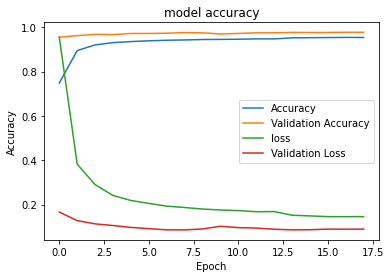

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

#Predictions:

In [ ]:
test_pred = keras_model.predict(X_test)

In [ ]:
y_pred=np.argmax(test_pred,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_pred,y_test)

In [ ]:
print(acc)

0.9763378230797234


#Writeup and summary:

# ***Problem formulation:***
We are trying to classify fish species given low quality crops taken from a live video dataset. And for that purpose we dispose of a database containing folders of images representing 23 species and their respective masks which were manualy labeled by actual biologists. the main objctif of designing a ML model for a classification task is to be able to predict to which specie a fish belongs to in real time given its picture than can be aquired using a sliding window technique in real life scenarios for exemple. disposing of the fish' specie's name can be userful to determine wether such a fish is an endengered specie, or a veminous one for exemple or it can help display a set of information concerning the captured fish automatically using a web interface in touristic aquariums ....

# ***Data modification:***
After visualizing the data distribution we notice that classes above 5 contain few data compared to other classes which can bias our model, for that purpose we only perform data augmentation on classes above 5 using geometrical transformations and by slightly adding gaussian noise.It is also to be noted that in order for our data to fit in the RAM we dispose of, the use of a datagenerator is innevitable.
We also choses to split our train set into a training and a validation data, the training data is used to train the model on decision making while the validation data is used to decide on the choice of hyperparametters. 
It is also known that training a CNN based model can be both time and ressource consuming, and our first experiences implementing a model for the challenge showed that not freezing the CNN layers only improve the model's performance if it is trained on a sufficient number of epochs which can consume a huge amount of time taking into consideration the hyperparametter tunning phase, for this purpose we choosed to freeze the CNN part of the model and use it to pass all our imaged through it and extract relevelant feature vectors then store them to use them as our new input data to the FC layers, that way we no longer need to pass our images through the CNN architecture during each epoch especially since the CNN's weights are freezed and not updated throughout the training process.

# ***Model used:***
Many models could be used in this case scenario,owing to the fact that we don't dispose of enough amounts of time nor ressources to train a complex CNN architecture from scratch we choosed to use two pretrained CNN architectures on the imagenet dataset on classification task and finetune their FC layers (transfer learning technique) in another words we assume that the CNN part of the architecture is trained on extracting relevelant features for classification tasks while the latest FC layers of the model are trained on the classification task and decision making.
We cover in our experiences a vgg16 architecture and a resnet architecture where resnet represents a deeper and more complex CNN architecture (The choice of architectures was mainly influenced by Andrew Ng's lecture).
We also implement an automatic hyperparammeter tunner to select the number of layers, hidden units, drop out rate, .... where are model performs best on the validation set.
We also use callback functions in order to avoid overfiting by stoped the model once the validation loss no longer decreases.

# ***Conclusion:***
Using both resnet and vgg16 we obtain an average of 97% accuracy, resnet being more complex and a deeper model, vgg16 is then a more optimal option to use in the prediction of image labels in real case scenarios especially if this model is used via a mobile application or a web site accessible across a network where the slightest delays can drastically impact the user's QoE.